In [1]:
import os
from datetime import datetime, timedelta

import matplotlib.pyplot as plt

In [2]:
n = 2 * 10**6
qs = [100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000]
modes = ["multi", "single"]

In [3]:
RFC3339_FORMAT = "%Y-%m-%dT%H:%M:%S.%fZ"
t = datetime.strptime("2023-04-07T13:37:12.345Z", RFC3339_FORMAT)

In [4]:
gen_time = dict()

for mode in modes:
    # Set mode
    os.system(
        "curl -s -X 'PUT' \
    'http://localhost:8080/Mode?mode="
        + mode
        + "' \
    -H 'accept: */*' > /dev/null"
    )
    # POST query
    tl = (t).isoformat() + "Z"
    dt = timedelta(seconds=n)
    tr = (t + dt).isoformat() + "Z"
    print("POST data in time interval:", tl, tr)
    print("This is", dt.total_seconds(), "seconds")
    start = datetime.now()
    os.system(
        "curl -s -X 'POST' \
    'http://localhost:8080/OrgTreeNodes/7/CH_Data?time_begin="
        + tl
        + "&time_end="
        + tr
        + "' \
    -H 'accept: */*' \
    -d '' > /dev/null"
    )
    finish = datetime.now()
    res = (finish - start).total_seconds()
    print("Done in", res, "seconds")
    gen_time[mode] = res

POST data in time interval: 2023-04-07T13:37:12.345000Z 2023-04-30T17:10:32.345000Z
This is 2000000.0 seconds
Done in 153.475114 seconds
POST data in time interval: 2023-04-07T13:37:12.345000Z 2023-04-30T17:10:32.345000Z
This is 2000000.0 seconds
Done in 259.311809 seconds


In [5]:
q_time = dict()

for mode in modes:
    # Set mode
    os.system(
        "curl -s -X 'PUT' \
    'http://localhost:8080/Mode?mode="
        + mode
        + "' \
    -H 'accept: */*' > /dev/null"
    )
    q_time[mode] = []
    # GET queries
    s60 = timedelta(seconds=60)
    for q in qs:
        tl = (t + s60).isoformat() + "Z"
        dt = timedelta(seconds=q)
        tr = (t + s60 + dt).isoformat() + "Z"
        print("GET data in time interval:", tl, tr)
        print("This is", dt.total_seconds(), "seconds")
        start = datetime.now()
        os.system(
            "curl -s -X 'GET' \
        'http://localhost:8080/OrgTreeNodes/7/CH_Data?time_begin="
            + tl
            + "&time_end="
            + tr
            + "' \
        -H 'accept: text/csv' > /dev/null"
        )
        finish = datetime.now()
        res = (finish - start).total_seconds()
        print("Done in", res, "seconds")
        q_time[mode].append(res)

GET data in time interval: 2023-04-07T13:38:12.345000Z 2023-04-07T13:39:52.345000Z
This is 100.0 seconds
Done in 0.079729 seconds
GET data in time interval: 2023-04-07T13:38:12.345000Z 2023-04-07T13:41:32.345000Z
This is 200.0 seconds
Done in 0.101608 seconds
GET data in time interval: 2023-04-07T13:38:12.345000Z 2023-04-07T13:46:32.345000Z
This is 500.0 seconds
Done in 0.160056 seconds
GET data in time interval: 2023-04-07T13:38:12.345000Z 2023-04-07T13:54:52.345000Z
This is 1000.0 seconds
Done in 0.279059 seconds
GET data in time interval: 2023-04-07T13:38:12.345000Z 2023-04-07T14:11:32.345000Z
This is 2000.0 seconds
Done in 0.533667 seconds
GET data in time interval: 2023-04-07T13:38:12.345000Z 2023-04-07T15:01:32.345000Z
This is 5000.0 seconds
Done in 1.535436 seconds
GET data in time interval: 2023-04-07T13:38:12.345000Z 2023-04-07T16:24:52.345000Z
This is 10000.0 seconds
Done in 3.964868 seconds
GET data in time interval: 2023-04-07T13:38:12.345000Z 2023-04-07T19:11:32.345000Z
Th

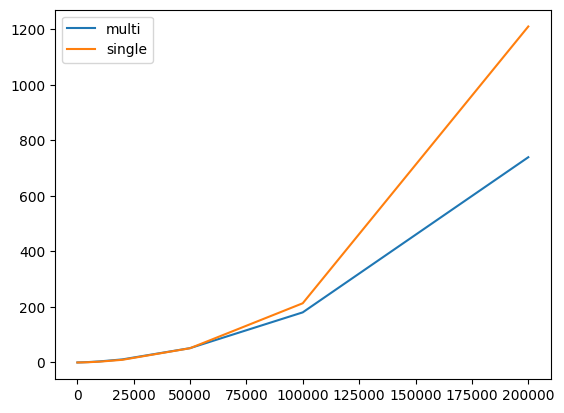

In [6]:
plt.plot(qs, q_time["multi"], label="multi")
plt.plot(qs, q_time["single"], label="single")
plt.legend()
plt.show()

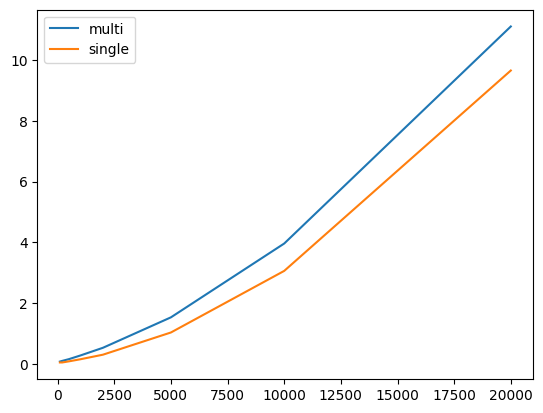

In [7]:
SMALL_N = 8

plt.plot(qs[:SMALL_N], q_time["multi"][:SMALL_N], label="multi")
plt.plot(qs[:SMALL_N], q_time["single"][:SMALL_N], label="single")
plt.legend()
plt.show()